In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

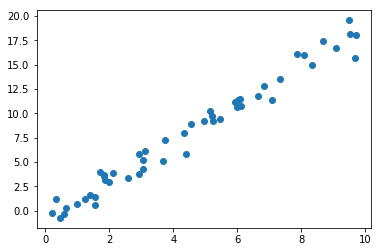

In [7]:

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [11]:
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(len(x),1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

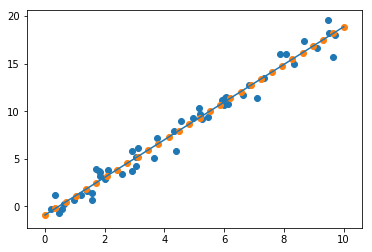

In [16]:
xfit = np.linspace(0,10,30)[:, np.newaxis]
yfit = model.predict(xfit)

plt.scatter(x,y)
plt.scatter(xfit,yfit)
plt.plot(xfit,yfit)

In [20]:
# classification
from sklearn.model_selection import train_test_split
import seaborn as sns

iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)


In [23]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
# The model can take a categorical variable as it's target
ytrain.head()

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
Name: species, dtype: object

In [21]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [25]:
# Images!
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

[4 5 6 7 8]


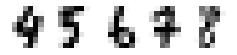

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(4,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
index = 14
for i in range(index, index+5):
    ax[i-index].imshow(digits.images[i])
print(digits.target[range(index, index+5)])

In [82]:
n1, d1, d2 = digits.images.shape
images_reshaped = digits.images.reshape(n1, d1*d2)


Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    images_reshaped,
    digits.target,
    random_state=10,
    train_size=0.5
)

In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_leaf=30)
model.fit(Xtrain, Ytrain)

test_predictions = model.predict(Xtest)

accuracy_score(Ytest, test_predictions)

0.8676307007786429

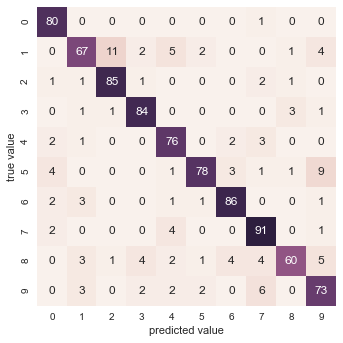

In [89]:
# confusion matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(Ytest, test_predictions)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

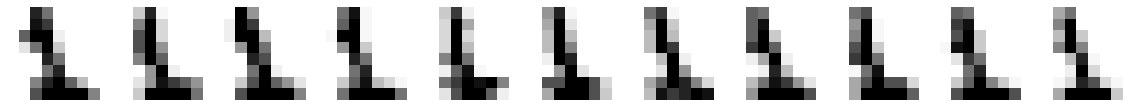

In [131]:
# I want to see the '1' images that were predicted as '2'
map_error_1_2 = np.where((Ytest==1) & (test_predictions==2))[0]

fig, axes = plt.subplots(nrows=1, ncols=len(map_error_1_2), figsize=(20,20),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

index=0
for i in map_error_1_2:
    axes[index].imshow(Xtest[i].reshape(8, 8))
    index += 1